# Data Analysis
### Project 1 Group 4

##### Matthew Lombardo, Brian Klovert, Thusneem Mohamed

In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
data_final = pd.read_csv("data/cleaned_project_data.csv")
data_final.head()

,Sex,Race,Age,Age Group,Education,Work Class,Occupation,Marital Status,Relationship,Income
0,Female,White,82,80s+,HS-grad,Private,Exec-managerial,Widowed,Not-in-family,<=50K
1,Female,White,54,50s,<HS,Private,Machine-op-inspct,Divorced,Unmarried,<=50K
2,Female,White,41,40s,Some-college,Private,Prof-specialty,Separated,Own-child,<=50K
3,Female,White,34,30s,HS-grad,Private,Other-service,Divorced,Unmarried,<=50K
4,Male,White,38,30s,<HS,Private,Adm-clerical,Separated,Unmarried,<=50K


In [3]:
def pie_grapher(data,variable,response,order,save):
    label = ["Below","Above"]
    color = ["red","limegreen"]
    
    the_grid = GridSpec(3,3)
    the_grid.update(wspace=0.3, hspace=0.3)
    plt.figure(figsize=(12,12))
    x = 0
    y = 0
    
    for i in order:
        pie_votes = data.loc[data[variable] == i][response].value_counts()
        
        plt.subplot(the_grid[x,y], aspect=1)   
        if x == 0:
            y = y + 1
            if y == 3:
                x = 1
                y = -1
        if x == 1:
            y = y + 1
            if y == 3:
                x = 2
                y = -1
        if x == 2:
            y = y + 1
            
        plt.pie(pie_votes, labels=label,  
        autopct="%1.1f%%", shadow=True, startangle=140,colors=color)
        plt.axis("equal")
        plt.title(i)
        
    if save == "save":
        plt.savefig("output/" + variable + "_" + response + "_pie.png")
        
    plt.show()

In [4]:
def bar_grapher(data,variable,response,order,save):
    proportions_below= []
    proportions_above= []
    
    for i in order:
        proportions_below.append(data.loc[data[variable] == i][response].value_counts(normalize=True)[0])
        proportions_above.append(data.loc[data[variable] == i][response].value_counts(normalize=True)[1])
        
    plt.figure(figsize=(10,6))
    N = len(data[variable].unique())
    ind = np.arange(N) 
    width = 0.35   
    
    plt.bar(ind, proportions_below, width, label="Below", color="Red")
    plt.bar(ind + width, proportions_above, width, label="Above", color="limegreen")
    
    plt.ylabel("Percentage")
    plt.title(str(response).capitalize() + " vs. " + str(variable).capitalize())
    plt.xticks(ind + width / 2, (order))
    plt.legend(loc="best")
    
    if save == "save":
        plt.savefig("output/" + variable + "_" + response + "_bar.png")

    plt.show()

In [5]:
def two_prop_z_test(data,response,variable,level_1,level_2,alpha_level):
    
    z, p_value = sm.stats.proportions_ztest(
        [data.loc[data[variable] == level_1][response].value_counts()[1],
        data.loc[data[variable] == level_2][response].value_counts()[1]], 
        [len(data.loc[data[variable] == level_1]),
        len(data.loc[data[variable] == level_2])])

    print("Z-score: " + str("{0:.4f}".format(z)))
    print("P-value: " + str("{0:.4f}".format(p_value)))
    print(" ")
    
    if p_value >= alpha_level:
        print("There is NOT a significant difference in income between " +
             str(level_1) + " & " + str(level_2) + " (at α = " + str(alpha_level) + ").")
    if p_value < alpha_level:
        print("There IS a significant difference in income between " +
             str(level_1) + " & " + str(level_2) + " (at α = " + str(alpha_level) + ").")

### Sex vs. Income

In [6]:
data_final.groupby("Sex")["Income"].value_counts(normalize=True)

Sex     Income
Female  <=50K     0.886506
        >50K      0.113494
Male    <=50K     0.686213
        >50K      0.313787
Name: Income, dtype: float64

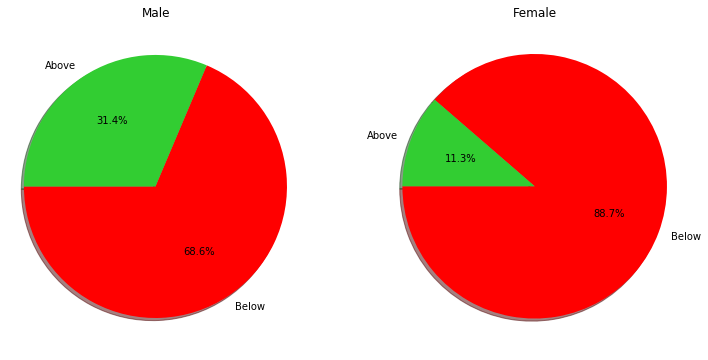

In [7]:
label = ["Below","Above"]
color = ["red","limegreen"]

the_grid = GridSpec(2,2)
the_grid.update(wspace=0.3, hspace=0)
plt.figure(figsize=(12,12))
x = 0
y = 0

for i in ["Male","Female"]:
    pie_votes = data_final.loc[data_final["Sex"] == i]["Income"].value_counts()
    
    plt.subplot(the_grid[x,y], aspect=1)   
    y = y + 1
   
    plt.pie(pie_votes, labels=label,  
        autopct="%1.1f%%", shadow=True, startangle=180,colors=color)
    plt.axis("equal")
    plt.title(i)
    
#plt.savefig("output/sex_income_pie.png")

plt.show()

In [8]:
two_prop_z_test(data_final,"Income","Sex","Male","Female",0.05)

Z-score: 37.9670
P-value: 0.0000
 
There IS a significant difference in income between Male & Female (at α = 0.05).


# ---------------------------------------------------------------------------------------------------------------

### Age vs. Income

In [9]:
data_final.groupby("Age Group")["Income"].value_counts(normalize=True)

Age Group  Income
20s        <=50K     0.933625
           >50K      0.066375
30s        <=50K     0.727576
           >50K      0.272424
40s        <=50K     0.624573
           >50K      0.375427
50s        <=50K     0.608369
           >50K      0.391631
60s        <=50K     0.720721
           >50K      0.279279
70s        <=50K     0.784530
           >50K      0.215470
80s+       <=50K     0.860215
           >50K      0.139785
<20        <=50K     0.999277
           >50K      0.000723
Name: Income, dtype: float64

In [10]:
age_order = ["<20","20s","30s","40s","50s","60s","70s","80s+"]

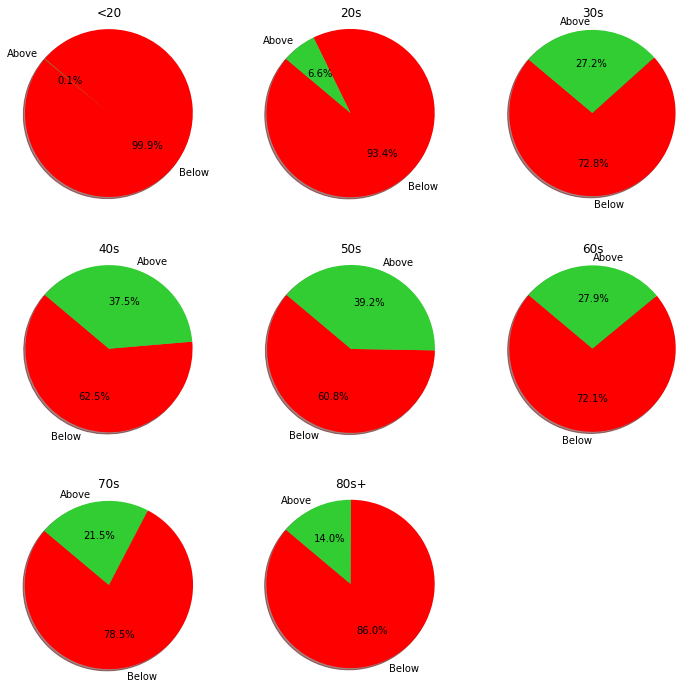

In [11]:
pie_grapher(data_final,"Age Group","Income",age_order,"dont save")

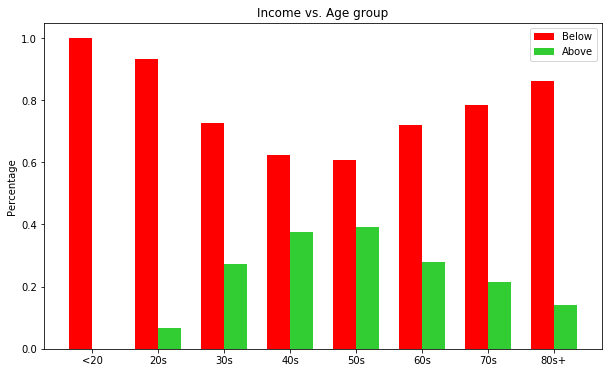

In [12]:
bar_grapher(data_final,"Age Group","Income",age_order,"dont save")

In [13]:
two_prop_z_test(data_final,"Income","Age Group","40s","50s",0.05)

Z-score: -1.7175
P-value: 0.0859
 
There is NOT a significant difference in income between 40s & 50s (at α = 0.05).


In [14]:
two_prop_z_test(data_final,"Income","Age Group","20s","80s+",0.05)

Z-score: -2.8090
P-value: 0.0050
 
There IS a significant difference in income between 20s & 80s+ (at α = 0.05).


# ---------------------------------------------------------------------------------------------------------------

### Education vs. Income 

In [15]:
data_final.groupby("Education")["Income"].value_counts(normalize=True)

Education     Income
<HS           <=50K     0.938498
              >50K      0.061502
Associate     <=50K     0.740709
              >50K      0.259291
Bachelors     <=50K     0.580085
              >50K      0.419915
Doctorate     >50K      0.741206
              <=50K     0.258794
HS-grad       <=50K     0.836577
              >50K      0.163423
Masters       >50K      0.561791
              <=50K     0.438209
Prof-school   >50K      0.743728
              <=50K     0.256272
Some-college  <=50K     0.800443
              >50K      0.199557
Name: Income, dtype: float64

In [16]:
edu_order = ["<HS","HS-grad","Some-college","Associate","Bachelors","Masters","Doctorate","Prof-school"]

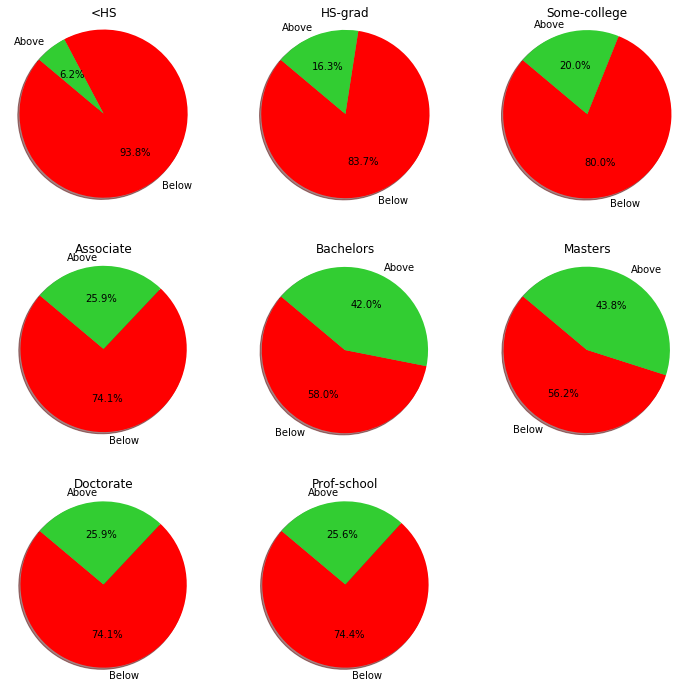

In [17]:
pie_grapher(data_final,"Education","Income",edu_order,"dont save")

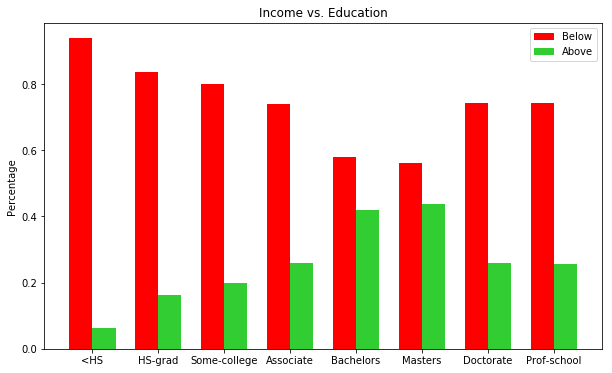

In [18]:
bar_grapher(data_final,"Education","Income",edu_order,"dont save")

In [19]:
two_prop_z_test(data_final,"Income","Education","Bachelors","Masters",0.05)

Z-score: -1.3169
P-value: 0.1879
 
There is NOT a significant difference in income between Bachelors & Masters (at α = 0.05).


In [20]:
two_prop_z_test(data_final,"Income","Education","<HS","HS-grad",0.05)

Z-score: -15.6664
P-value: 0.0000
 
There IS a significant difference in income between <HS & HS-grad (at α = 0.05).


In [21]:
two_prop_z_test(data_final,"Income","Education","Some-college","HS-grad",0.05)

Z-score: 5.9989
P-value: 0.0000
 
There IS a significant difference in income between Some-college & HS-grad (at α = 0.05).


In [22]:
two_prop_z_test(data_final,"Income","Education","Some-college","Associate",0.05)

Z-score: -6.0659
P-value: 0.0000
 
There IS a significant difference in income between Some-college & Associate (at α = 0.05).


# ---------------------------------------------------------------------------------------------------------------

### Race vs. Income

In [23]:
data_final.groupby("Race")["Income"].value_counts(normalize=True)

Race                Income
Amer-Indian-Eskimo  <=50K     0.881119
                    >50K      0.118881
Asian-Pac-Islander  <=50K     0.721766
                    >50K      0.278234
Black               <=50K     0.870058
                    >50K      0.129942
Other               <=50K     0.907258
                    >50K      0.092742
White               <=50K     0.735980
                    >50K      0.264020
Name: Income, dtype: float64

In [24]:
race_order = data_final["Race"].unique()

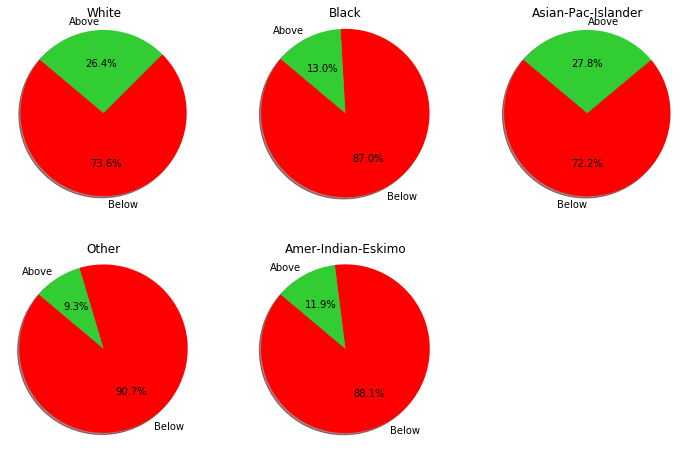

In [25]:
pie_grapher(data_final,"Race","Income",race_order,"dont save")

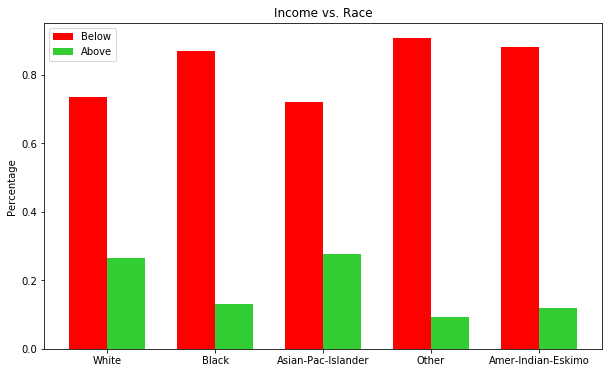

In [26]:
bar_grapher(data_final,"Race","Income",race_order,"dont save")

In [27]:
two_prop_z_test(data_final,"Income","Race","White","Asian-Pac-Islander",0.05)

Z-score: -0.9876
P-value: 0.3234
 
There is NOT a significant difference in income between White & Asian-Pac-Islander (at α = 0.05).


In [28]:
two_prop_z_test(data_final,"Income","Race","Black","Amer-Indian-Eskimo",0.05)

Z-score: 0.5325
P-value: 0.5943
 
There is NOT a significant difference in income between Black & Amer-Indian-Eskimo (at α = 0.05).


# ---------------------------------------------------------------------------------------------------------------

### Marital Status vs. Income

In [29]:
data_final.groupby("Marital Status")["Income"].value_counts(normalize=True)

Marital Status  Income
Divorced        <=50K     0.892673
                >50K      0.107327
Married         <=50K     0.554953
                >50K      0.445047
Never-married   <=50K     0.951372
                >50K      0.048628
Separated       <=50K     0.931178
                >50K      0.068822
Widowed         <=50K     0.903571
                >50K      0.096429
Name: Income, dtype: float64

In [30]:
MS_order = ["Never-married","Married","Separated","Divorced","Widowed"]

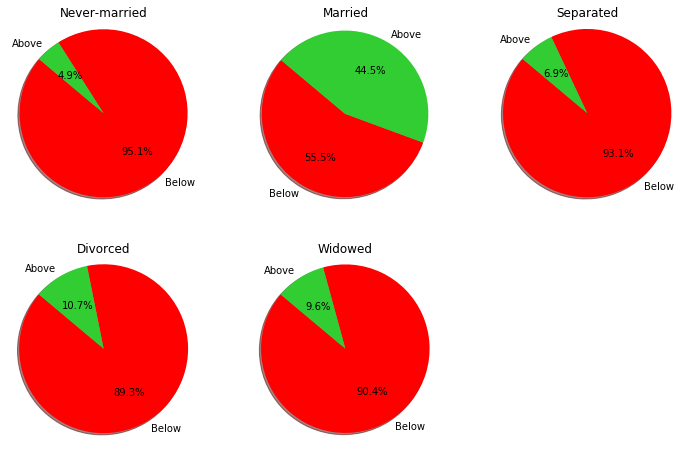

In [31]:
pie_grapher(data_final,"Marital Status","Income",MS_order,"dont save")

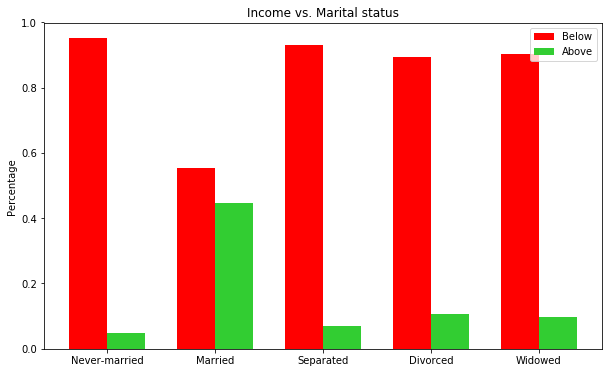

In [32]:
bar_grapher(data_final,"Marital Status","Income",MS_order,"dont save")

In [33]:
two_prop_z_test(data_final,"Income","Marital Status","Never-married","Separated",0.05)

Z-score: -2.7293
P-value: 0.0063
 
There IS a significant difference in income between Never-married & Separated (at α = 0.05).


In [34]:
two_prop_z_test(data_final,"Income","Marital Status","Divorced","Separated",0.05)

Z-score: 3.5869
P-value: 0.0003
 
There IS a significant difference in income between Divorced & Separated (at α = 0.05).


# ---------------------------------------------------------------------------------------------------------------

### Relationship vs. Income

In [35]:
data_final.groupby("Relationship")["Income"].value_counts(normalize=True)

Relationship    Income
Husband         <=50K     0.544317
                >50K      0.455683
Not-in-family   <=50K     0.893452
                >50K      0.106548
Other-relative  <=50K     0.960784
                >50K      0.039216
Own-child       <=50K     0.985414
                >50K      0.014586
Unmarried       <=50K     0.933965
                >50K      0.066035
Wife            <=50K     0.508711
                >50K      0.491289
Name: Income, dtype: float64

In [36]:
relationship_order = ["Husband","Wife","Unmarried","Other-relative","Own-child","Not-in-family"]

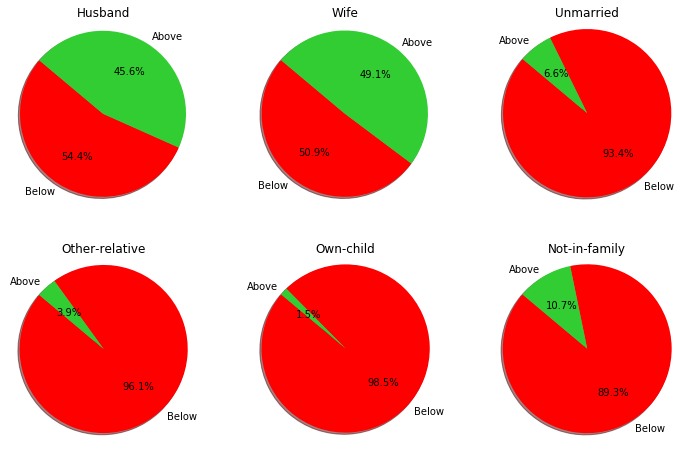

In [37]:
pie_grapher(data_final,"Relationship","Income",relationship_order,"dont save")

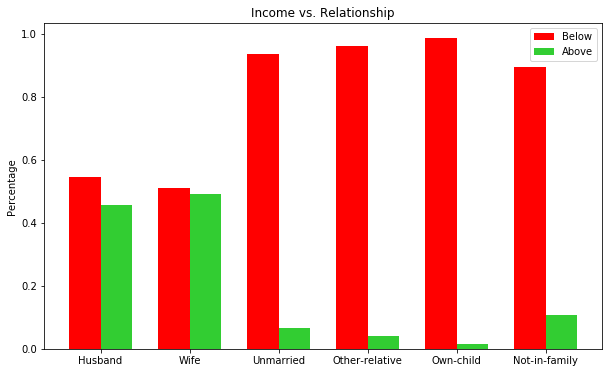

In [38]:
bar_grapher(data_final,"Relationship","Income",relationship_order,"dont save")

In [39]:
two_prop_z_test(data_final,"Income","Relationship","Husband","Wife",0.05)

Z-score: -2.5656
P-value: 0.0103
 
There IS a significant difference in income between Husband & Wife (at α = 0.05).


# ---------------------------------------------------------------------------------------------------------------

### Work Class & Occupation vs. Income

In [40]:
data_final.groupby("Work Class")["Income"].value_counts(normalize=True)

Work Class        Income
Federal-gov       <=50K     0.613542
                  >50K      0.386458
Local-gov         <=50K     0.705208
                  >50K      0.294792
Private           <=50K     0.781327
                  >50K      0.218673
Self-emp-inc      >50K      0.557348
                  <=50K     0.442652
Self-emp-not-inc  <=50K     0.715073
                  >50K      0.284927
State-gov         <=50K     0.728043
                  >50K      0.271957
Without-pay       <=50K     1.000000
Name: Income, dtype: float64

In [41]:
WP = data_final.loc[data_final["Work Class"] == "Without-pay"]
data_WC = data_final.drop(data_final.index[WP.index.values])
data_WC = data_WC.reset_index(drop=True)

In [42]:
data_WC.groupby("Work Class")["Income"].value_counts(normalize=True)

Work Class        Income
Federal-gov       <=50K     0.613542
                  >50K      0.386458
Local-gov         <=50K     0.705208
                  >50K      0.294792
Private           <=50K     0.781327
                  >50K      0.218673
Self-emp-inc      >50K      0.557348
                  <=50K     0.442652
Self-emp-not-inc  <=50K     0.715073
                  >50K      0.284927
State-gov         <=50K     0.728043
                  >50K      0.271957
Name: Income, dtype: float64

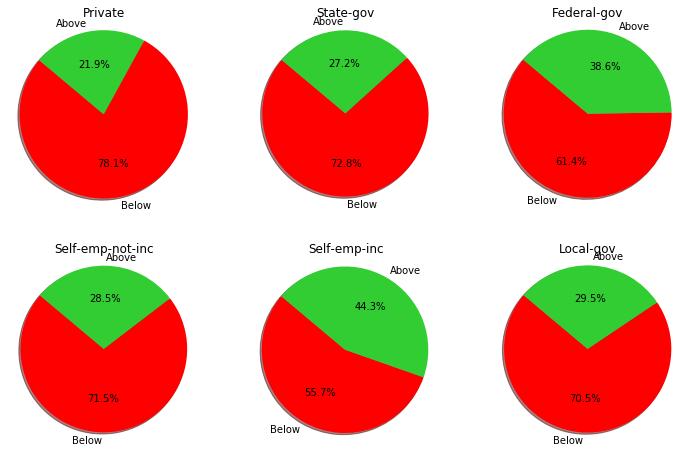

In [43]:
pie_grapher(data_WC,"Work Class","Income",data_WC["Work Class"].unique(),"dont save")

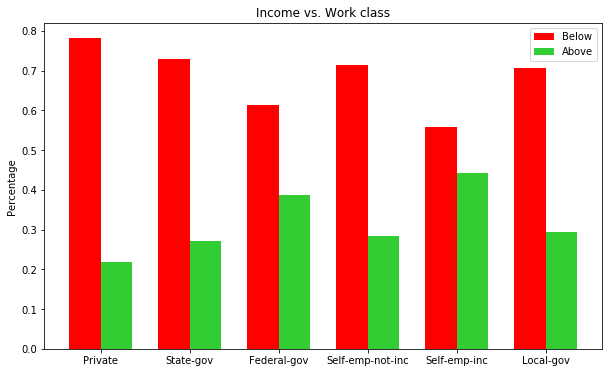

In [44]:
bar_grapher(data_WC,"Work Class","Income",data_WC["Work Class"].unique(),"dont save")

In [45]:
two_prop_z_test(data_final,"Income","Work Class","Self-emp-inc","Federal-gov",0.05)

Z-score: 2.5894
P-value: 0.0096
 
There IS a significant difference in income between Self-emp-inc & Federal-gov (at α = 0.05).


In [46]:
two_prop_z_test(data_final,"Income","Work Class","Private","State-gov",0.05)

Z-score: -4.4958
P-value: 0.0000
 
There IS a significant difference in income between Private & State-gov (at α = 0.05).


In [47]:
two_prop_z_test(data_final,"Income","Work Class","Federal-gov","Local-gov",0.05)

Z-score: 5.0264
P-value: 0.0000
 
There IS a significant difference in income between Federal-gov & Local-gov (at α = 0.05).


In [48]:
data_final.groupby("Occupation")["Income"].value_counts(normalize=True)

Occupation         Income
Adm-clerical       <=50K     0.865517
                   >50K      0.134483
Armed-Forces       <=50K     0.888889
                   >50K      0.111111
Craft-repair       <=50K     0.773359
                   >50K      0.226641
Exec-managerial    <=50K     0.515986
                   >50K      0.484014
Farming-fishing    <=50K     0.884306
                   >50K      0.115694
Handlers-cleaners  <=50K     0.937226
                   >50K      0.062774
Machine-op-inspct  <=50K     0.875125
                   >50K      0.124875
Other-service      <=50K     0.958422
                   >50K      0.041578
Priv-house-serv    <=50K     0.993289
                   >50K      0.006711
Prof-specialty     <=50K     0.550966
                   >50K      0.449034
Protective-serv    <=50K     0.674884
                   >50K      0.325116
Sales              <=50K     0.730685
                   >50K      0.269315
Tech-support       <=50K     0.695043
                   >50K 

In [49]:
# Due to occupation having far more levels than the other variables, I have to tweak my functions to work with it

In [50]:
def pie_grapher2(data,variable,response,order,save):
    label = ["Below","Above"]
    color = ["red","limegreen"]
    
    the_grid = GridSpec(4,4)
    the_grid.update(wspace=0.3, hspace=0.3)
    plt.figure(figsize=(12,12))
    x = 0
    y = 0
    
    for i in order:
        pie_votes = data.loc[data[variable] == i][response].value_counts()
        
        plt.subplot(the_grid[x,y], aspect=1)   
        if x == 0:
            y = y + 1
            if y == 4:
                x = 1
                y = -1
        if x == 1:
            y = y + 1
            if y == 4:
                x = 2
                y = -1
        if x == 2:
            y = y + 1
            if y == 4:
                x = 3
                y = -1
        if x == 3:
            y = y + 1
                     
        plt.pie(pie_votes, labels=label,  
        autopct="%1.1f%%", shadow=True, startangle=140,colors=color)
        plt.axis("equal")
        plt.title(i)
        
    if save == "save":
        plt.savefig("output/" + variable + "_" + response + "_pie.png")
    
    plt.show()

def bar_grapher2(data,variable,response,order,save):
    proportions_below= []
    proportions_above= []
    
    for i in order:
        proportions_below.append(data.loc[data[variable] == i][response].value_counts(normalize=True)[0])
        proportions_above.append(data.loc[data[variable] == i][response].value_counts(normalize=True)[1])
        
    plt.figure(figsize=(15,6))
    N = len(data[variable].unique())
    ind = np.arange(N) 
    width = 0.35   
    
    plt.bar(ind, proportions_below, width, label="Below", color="Red")
    plt.bar(ind + width, proportions_above, width, label="Above", color="limegreen")
    
    plt.ylabel("Percentage")
    plt.title(str(response).capitalize() + " vs. " + str(variable).capitalize())
    plt.xticks(ind + width / 2, (order),rotation=30)
    plt.legend(loc="best")
    
    if save == "save":
        plt.savefig("output/" + variable + "_" + response + "_bar.png")

    plt.show()

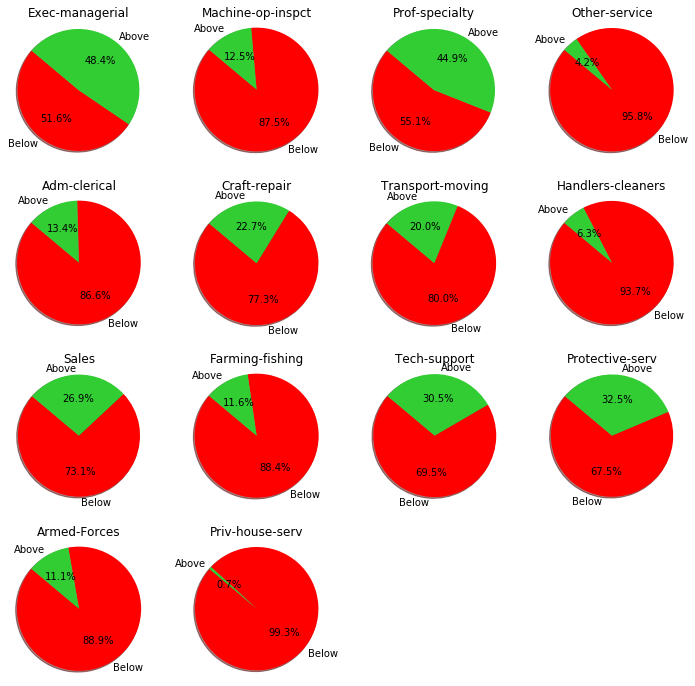

In [51]:
pie_grapher2(data_final,"Occupation","Income",data_final["Occupation"].unique(),"dont save")

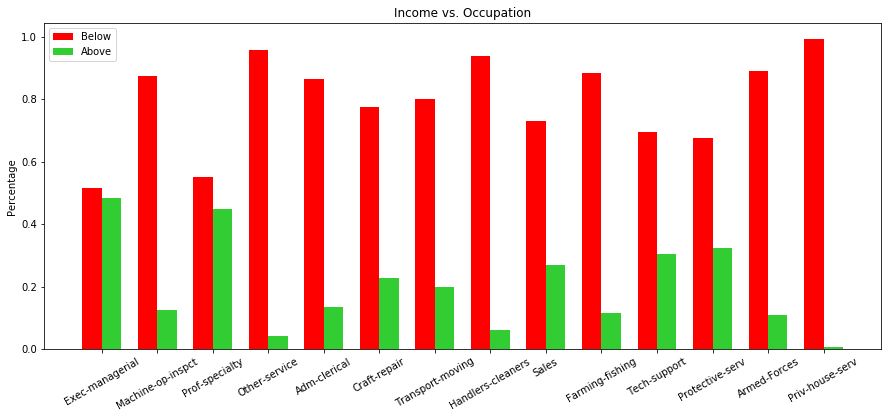

In [52]:
bar_grapher2(data_final,"Occupation","Income",data_final["Occupation"].unique(),"dont save")